## x^3 + x - 1 = 0 
* локализовать корни
* итерационно уточнить корни:
  1. половинное деление
  2. метод Ньютона
  3. простые итерации

In [1]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import numpy as np

### Половинное деление

In [2]:
def func(x):
    return x ** 3 + x - 1

In [3]:
def division_in_halves(a, b, eps=0.01):
    if (func(a) * func(b) > 0):
        print("Error: f(a) * f(b) > 0")
        return []
    ans = []
    while True:
        if abs(b - a) < eps:
            return ans
        mid = (a + b) / 2
        ans.append(mid)
        if func(a) * func(mid) < 0:
            b = mid
        else:
            a = mid


In [4]:
xs = division_in_halves(0, 1)
for x in [("x_" + str(i), val) for (i, val) in enumerate(xs)]:
    print(x)

('x_0', 0.5)
('x_1', 0.75)
('x_2', 0.625)
('x_3', 0.6875)
('x_4', 0.65625)
('x_5', 0.671875)
('x_6', 0.6796875)


In [5]:
x = np.arange(-0.5, 1.5, 0.1)
y = func(x) 

a_y = np.arange(0, func(1), 0.1)
a_x = np.ones(len(a_y))

b_y = np.arange(func(0), 0, 0.1)
b_x = np.zeros(len(b_y))

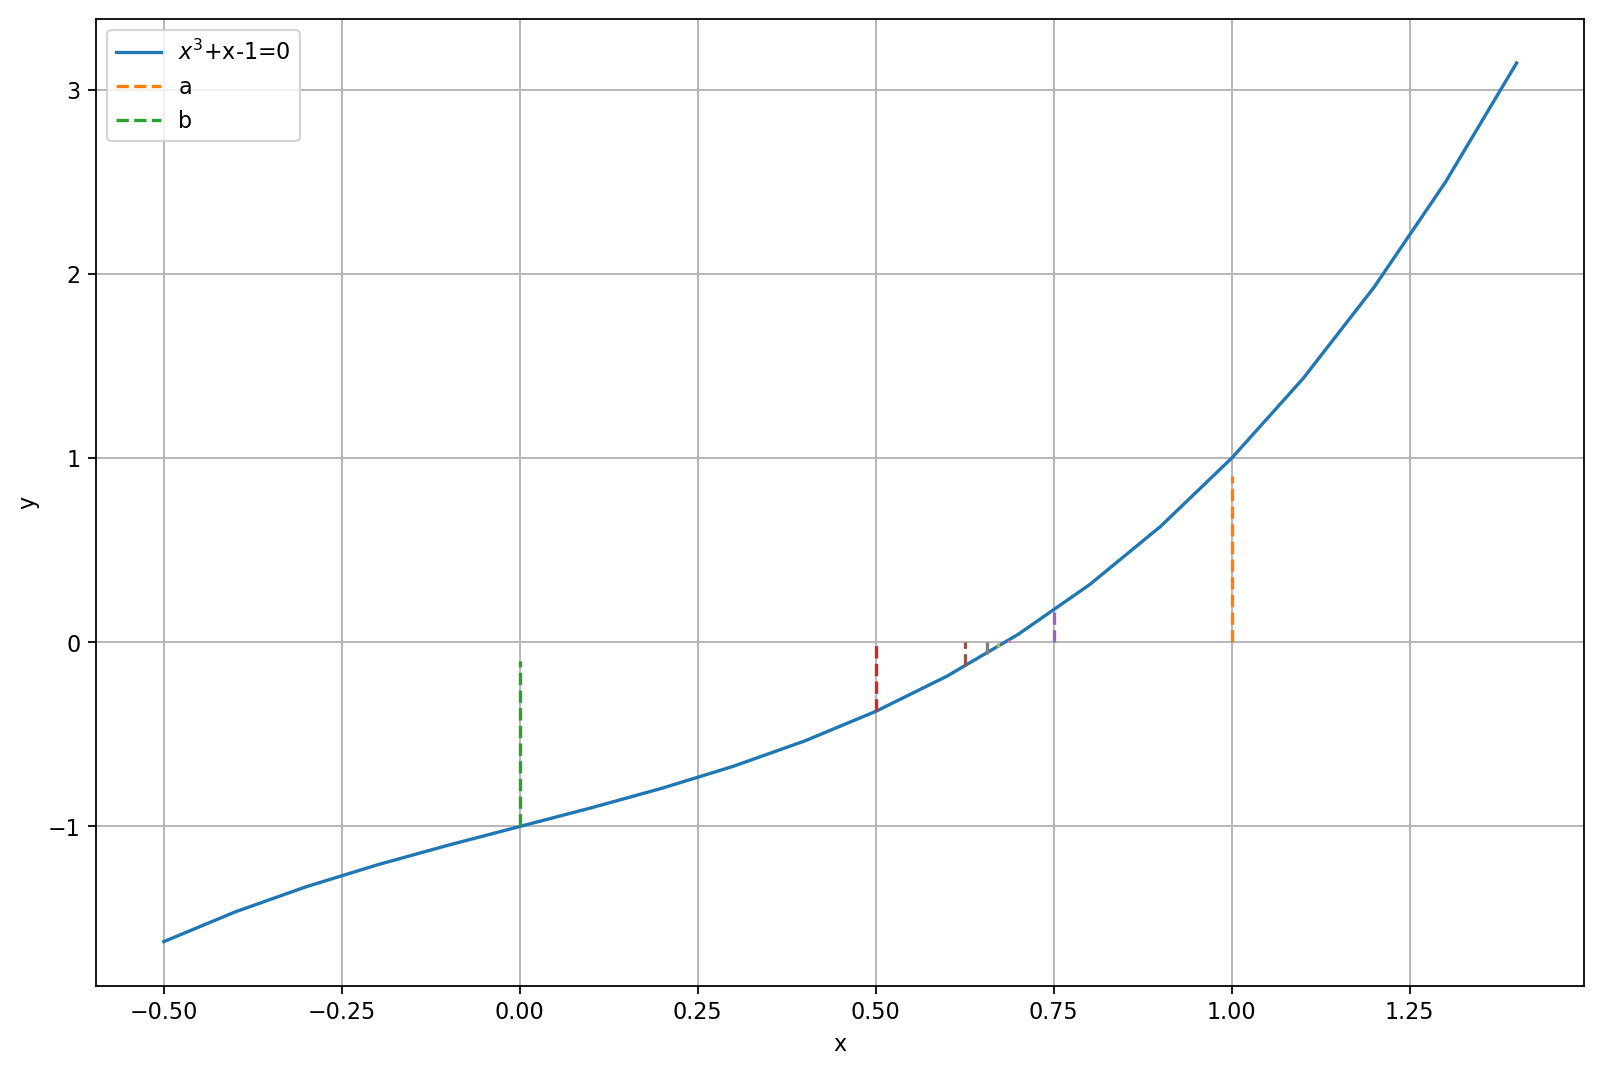

In [6]:
plt.figure(num=None, figsize=(12, 8), dpi=160, facecolor='w', edgecolor='k')
plt.plot(x, y, label='$x^3$+x-1=0')
plt.plot(a_x, a_y, '--',label='a')
plt.plot(b_x, b_y, '--',label='b')
for i in xs:
    yy = np.arange(0, func(i), 0.01) if func(i) >= 0 else np.arange(func(i), 0, 0.01)
    xx = np.full(len(yy), i)
    plt.plot(xx, yy, '--')

plt.grid(True)
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.show()

### Метод Ньютона

In [7]:
def func1(x):# производная нашего уравнения 
    return 3 * x * x + 1

In [8]:
def newtoneMethod(x0, eps=0.01):
    x = x0
    ans = [x0]
    while(True):
        xk = x - (func(x) / func1(x))
        if abs(xk - x) >= eps:
            x = xk;
            ans.append(x)
        else:
            return ans

In [9]:
x_values = newtoneMethod(1)
x_values

[1, 0.75, 0.686046511627907]

In [10]:
def tangent_line(x, xk):
    return func(xk) + func1(xk)*(x - xk)

In [11]:
x = np.arange(0, 2, 0.01)
y = func(x) 

q = np.arange(0, 2, 0.001)
ww = [tangent_line(q, x) for x in x_values]
    

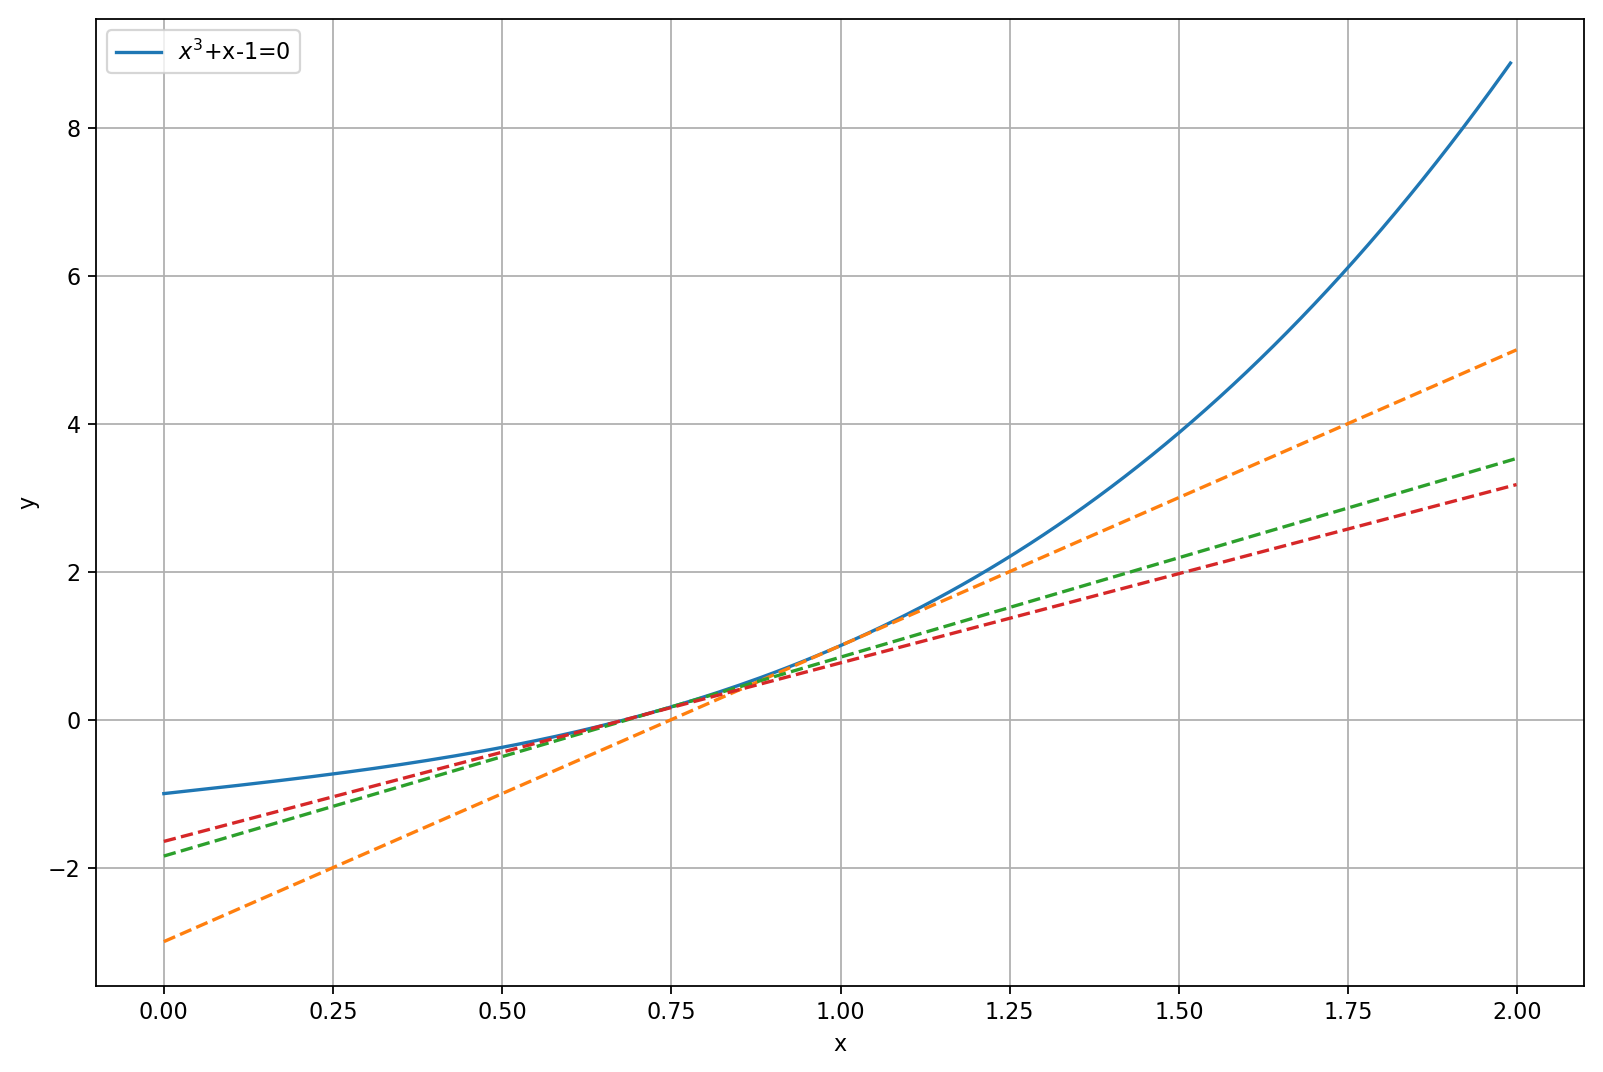

In [12]:
plt.figure(num=None, figsize=(12, 8), dpi=160, facecolor='w', edgecolor='k')
plt.plot(x, y, label='$x^3$+x-1=0')
for val in ww:
    plt.plot(q, val, '--')

plt.grid(True)
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.show()

### Метод простых итераций

In [13]:
def phi(x, M):
    return x - func(x)/M

Приводим наше уравнение $F(x) = 0$ к $\phi(x) = x$  

$\phi(x) = x - F(x) / M$, где М неизвестная константа, которая определяется из условия сходимости метода простой итерации $ 0 < |\phi'(x)| < 1 $ 
Для определения М перепишем условие, $|1 - F'(x_0)| < 1 $ или $M = 1.01 * F'(x_0) $  


In [14]:
def simpleIteration(x0, eps=0.001):
    x = x0
    ans = [x0]
    while(True):
        xk = phi(x, 5)
        ans.append(xk)
        if abs(xk - x) >= eps:
            x = xk
        else:
            return ans

In [15]:
vals = simpleIteration(1)
vals

[1,
 0.8,
 0.7376,
 0.7098211893248,
 0.6963288209171967,
 0.6895367327063454,
 0.6860598342688004,
 0.6842652000808757,
 0.6833349851276709]

In [16]:
x = np.arange(0, 1.4, 0.1)
y = phi(x, 5) 


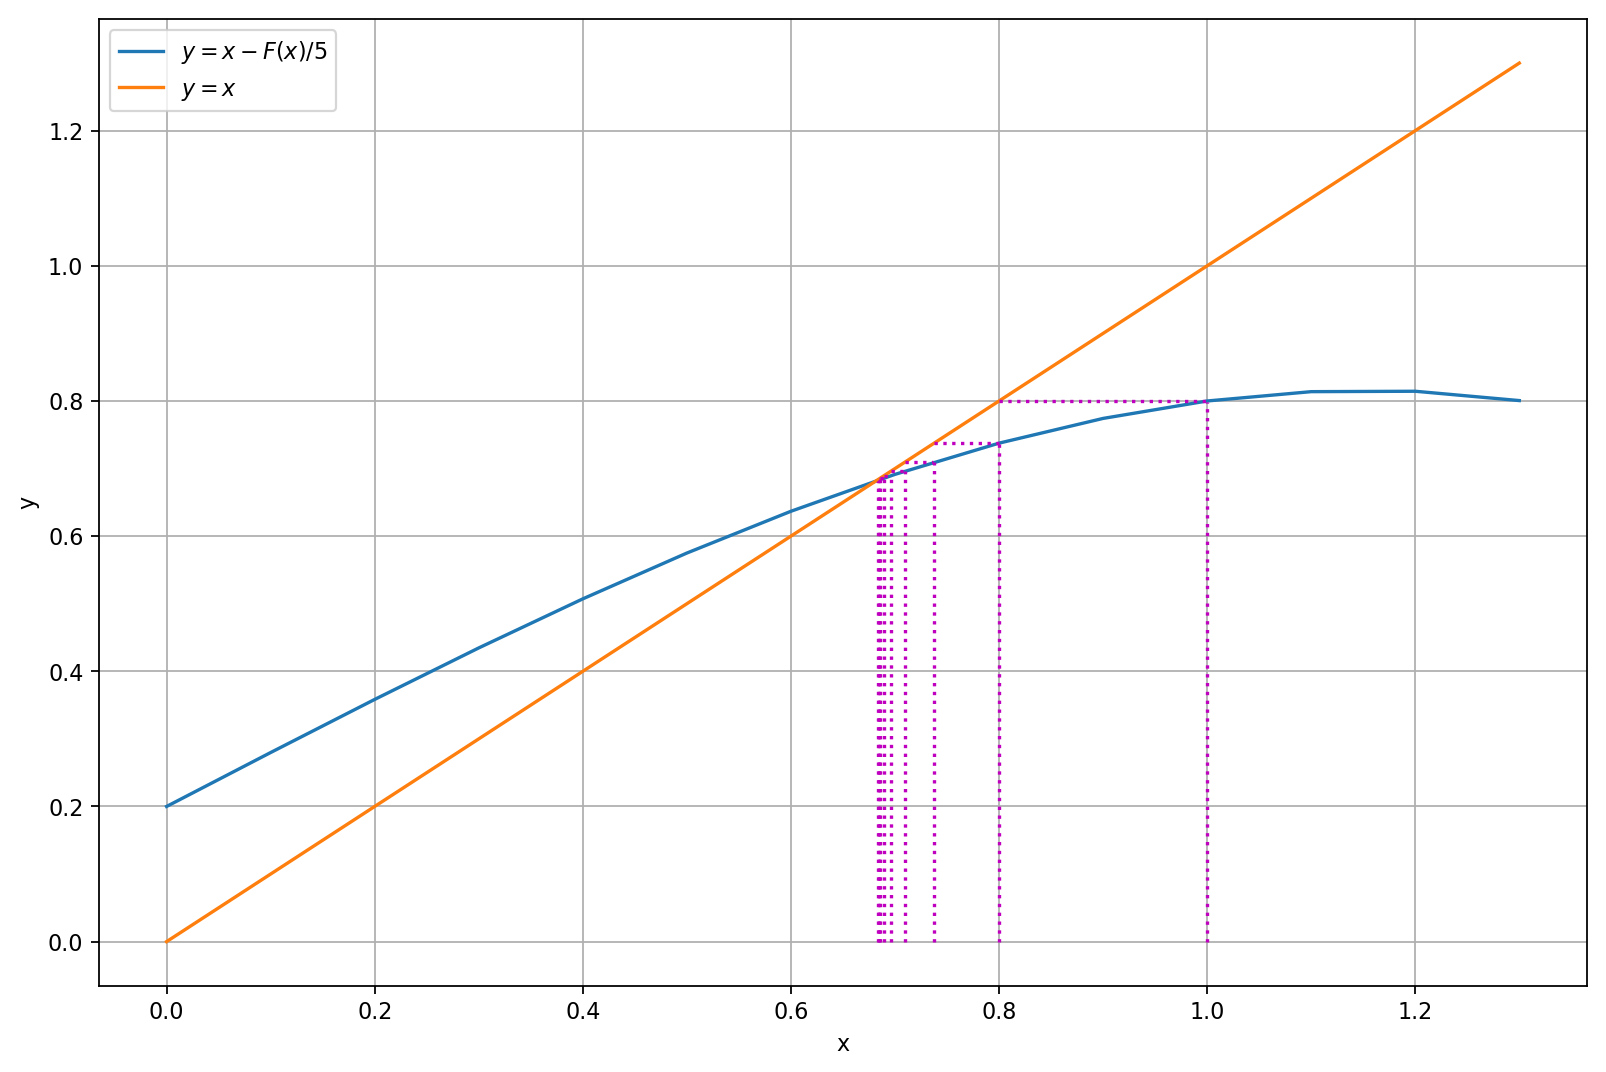

In [17]:
plt.figure(num=None, figsize=(12, 8), dpi=160, facecolor='w', edgecolor='k')
plt.plot(x, y, label='$y = x - F(x) / 5$')
plt.plot(x, x, label='$y = x$')
for i in vals:
    yy = np.arange(0, phi(i, 5), 0.001) if phi(i, 5) >= 0 else np.arange(phi(i, 5), 0, 0.001)
    xx = np.full(len(yy), i)
    qq = np.arange(i, phi(i, 5), 0.001) if i < phi(i, 5) else np.arange(phi(i, 5), i, 0.001)
    ww = np.full(len(qq), phi(i, 5))
    plt.plot(xx, yy, ':m')
    plt.plot(qq, ww, ':m')

plt.grid(True)
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.show()